Búsqueda local
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Función a optimizar

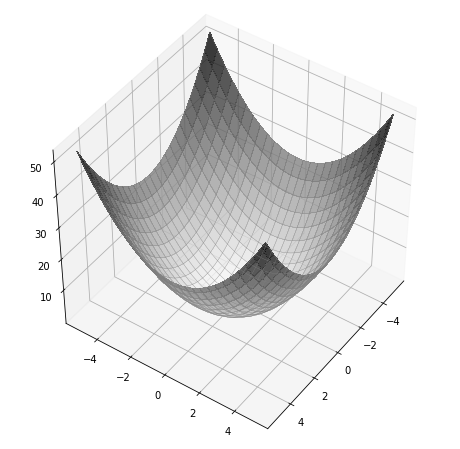

In [1]:
from EOS.benchmarks import Sphere 

fn = Sphere(n_dim=2)
fn.plot_surface()

## Algoritmo

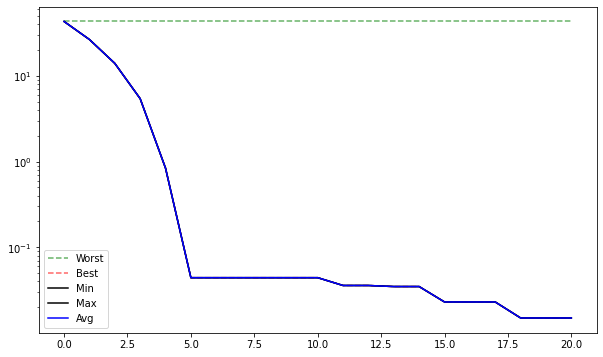

In [2]:
from EAOS.algorithms import LocalSearch
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomUniform
from EAOS.monitor import Monitor

#
# Genera una población de una sola solución
#
monte_carlo = RandomUniform(
    pop_size=1,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)
solutions = monte_carlo()


#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
evaluator = FnEvaluator(fn)

#
# Se instancia un objeto para computar las estadísticas de
# la corrida
#
monitor = Monitor()

#
#  Optimizador
#
optimizer = LocalSearch(
    fn=fn,
    delta0=0.5,
    reduction_factor=0.9,
)

#
# Algoritm
#
solutions = monte_carlo()
solutions = evaluator(solutions)
monitor(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    monitor(solutions)

monitor.plot_stats()

In [3]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0.08612341, 0.08682535]), 0.01495588281900452)

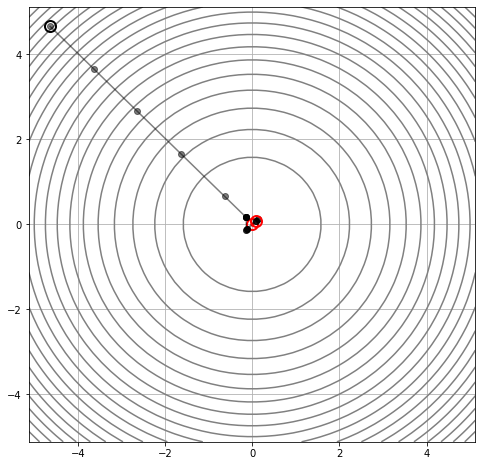

In [4]:
#
# Trayectoria del punto inicial al punto final
#
fn.plot_trayectory(monitor)

## Genetización del método de búsqueda local (equivalente a reiniciar)

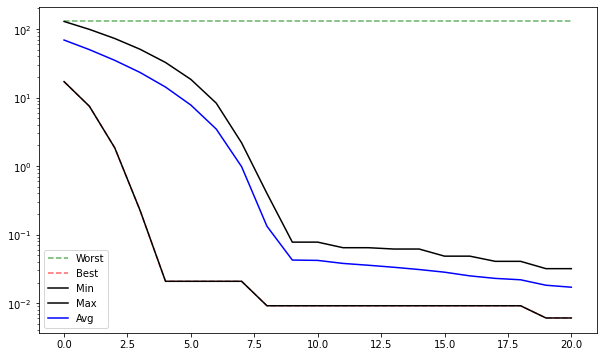

In [5]:
#
# Inicializa los operadores
#
monitor = Monitor()

POPSIZE = 10
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-10, -10],
    high=[10, 10],
)

optimizer = LocalSearch(
    fn=fn,
    delta0=0.5,
    reduction_factor=0.9,
)

#
# Algoritmo
#
solutions = monte_carlo()
solutions = evaluator(solutions)
monitor(solutions)

NITER = 20

for iter in range(NITER):
    solutions = optimizer(solutions)
    monitor(solutions)

monitor.plot_stats()

In [6]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([-0.07798777,  0.00143435]), 0.006084149384639514)